# Logistic Regression

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
dataset  =pd.read_csv('breast_cancer.csv')
X = dataset.iloc[:,1 :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## Training the Logistic Regression model on the Training set

In [4]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [5]:
y_pred = classifier.predict(X_test)

#Making the Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  3]
 [ 3 47]]


#Computing the accuracy with k-Fold Cross Validation

In [7]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.70 %
Standard Deviation: 1.97 %


## Df Frame

In [8]:
df_train = pd.DataFrame(X_train, columns=dataset.columns[1:-1])
df_train['etiket'] = y_train

df_test = pd.DataFrame(X_test, columns=dataset.columns[1:-1])
df_test['etiket'] = y_test

## Visualising the Training set results

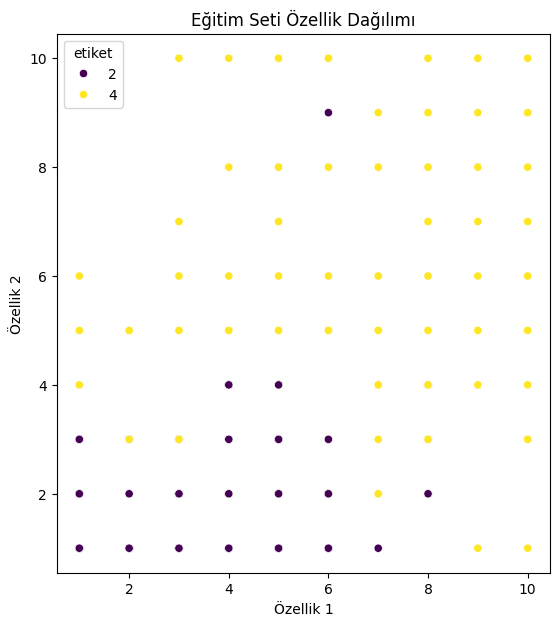

In [12]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)

# Eğer 'etiket' sütunu sayısal değilse, sayısal tipe dönüştürme
df_train['etiket'] = df_train['etiket'].astype(int)

# Scatterplot'u oluşturma
sns.scatterplot(x=df_train.iloc[:, 0], y=df_train.iloc[:, 1], hue=df_train['etiket'], palette='viridis')

plt.title('Eğitim Seti Özellik Dağılımı')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

## Visualising the Test set results

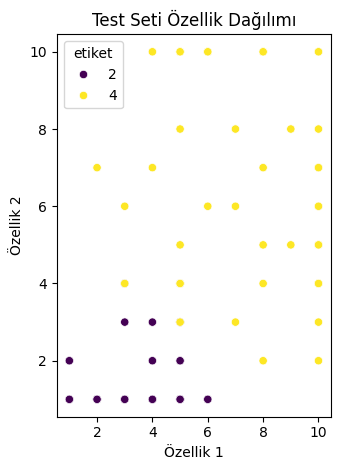

In [14]:
plt.subplot(1, 2, 2)

# Eğer 'etiket' sütunu sayısal değilse, sayısal tipe dönüştürme
df_test['etiket'] = df_test['etiket'].astype(int)

# Scatterplot'u oluşturma
sns.scatterplot(x=df_test.iloc[:, 0], y=df_test.iloc[:, 1], hue=df_test['etiket'], palette='viridis')

plt.title('Test Seti Özellik Dağılımı')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')

plt.tight_layout()
plt.show()

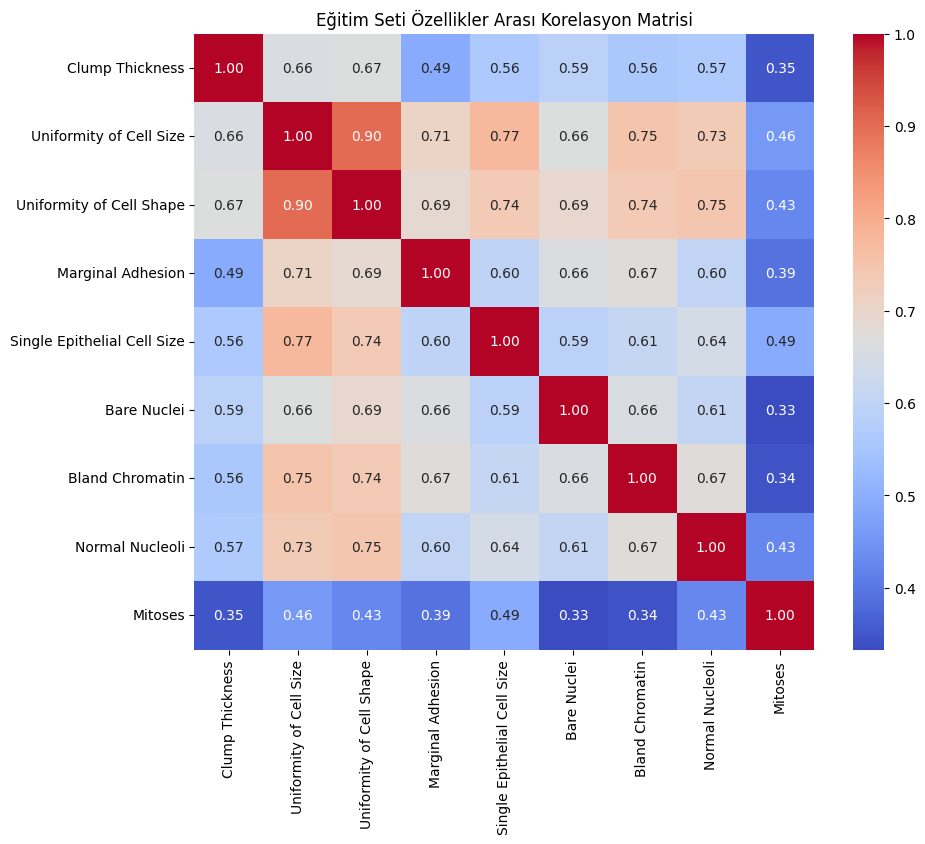

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix_train = pd.DataFrame(X_train, columns=dataset.columns[1:-1]).corr()
sns.heatmap(corr_matrix_train, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Eğitim Seti Özellikler Arası Korelasyon Matrisi')
plt.show()